In [1]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import datetime
from scipy import stats

In [2]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

tbfont = {'fontname': 'Times New Roman Bold'}
tfont = {'fontname':'Times New Roman'}

mpl.rc('text', usetex=True)

In [4]:
lsat = pd.read_csv('LogicData_deidentified.csv', encoding = 'ISO-8859-1')
lsat['Duration (in seconds)'] = lsat['Duration (in seconds)'].astype(int)

lsat['score'] = lsat['SC0'].astype(float)
lsat['absAssess0'] = lsat['absAssess0'].astype(float)
lsat['absAssess1'] = lsat['absAssess1'].astype(float)
lsat['relAssess0'] = lsat['relAssess0_1'].astype(float)
lsat['relAssess1'] = lsat['relAssess1_1'].astype(float)
lsat['diffSelf0'] = lsat['diffSelf0_1'].astype(float)
lsat['diffSelf1'] = lsat['diffSelf1_1'].astype(float)
lsat['diffOther0'] = lsat['diffOther0_1'].astype(float)
lsat['diffOther1'] = lsat['diffOther1_1'].astype(float)
lsat['grammarAssess0'] = lsat['logicAssess0_1'].astype(float)
lsat['grammarAssess1'] = lsat['logicAssess1_1'].astype(float)


len(lsat)

3543

In [6]:
params = {'axes.labelsize': 20,'axes.titlesize':20, 'text.fontsize': 20, 'legend.fontsize': 20, 'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)

/Users/racheljansen/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


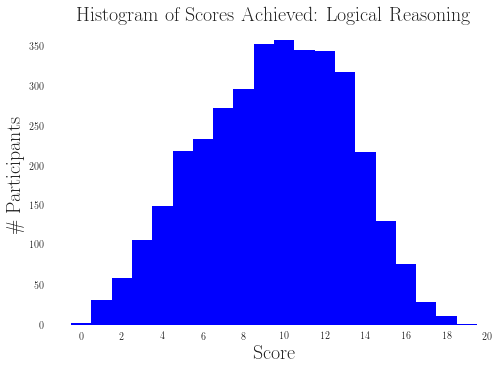

In [20]:
fig, ax = plt.subplots()
plt.hist(lsat.score, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],color='b',align='left')
plt.title('Histogram of Scores Achieved: Logical Reasoning',fontsize=20)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks([0,50,100,150,200,250,300,350])

ax.set_xlabel('Score',fontsize=20)#
ax.set_ylabel('\# Participants',fontsize=20)

ax.set_facecolor('white')
plt.show()
# fig.savefig('figs/score_hist_lsat.eps', dpi=1000)

In [21]:
lsat['gender'].value_counts()

Woman                1778
Man                  1731
Prefer not to say      15
Other                  11
Name: gender, dtype: int64

In [22]:
lsat.race.value_counts()

White                                                                            2553
Black or African American                                                         350
Asian/Asian American                                                              246
Hispanic or Latino                                                                196
White,Hispanic or Latino                                                           37
Other                                                                              32
American Indian or Alaska Native                                                   22
Prefer not to say                                                                  19
White,Asian/Asian American                                                         14
White,Black or African American                                                    13
White,American Indian or Alaska Native                                             10
Hispanic or Latino,Black or African American          

In [23]:
lsat['age_groups'] = np.where(lsat.age.astype(float) <= 35, '18-34', 
                              np.where(lsat.age.astype(float) >=55 , '55+', 
                                       '35-54'))
lsat.age_groups.value_counts()

18-34    1962
35-54    1249
55+       332
Name: age_groups, dtype: int64

In [7]:
lsat_ages = lsat[(lsat.age.astype(float) < 100) & (lsat.age.astype(float) >= 18)]
print('min age: ', lsat_ages.age.astype(float).min())
print('max age: ', lsat_ages.age.astype(float).max())

min age:  18.0
max age:  81.0


In [8]:
print('mean age: ', lsat_ages.age.astype(float).mean(), ' years')

mean age:  36.58856819468025  years


In [9]:
print('mean time: ', lsat['Duration (in seconds)'].mean()/60, ' minutes')

mean time:  23.47962649355537  minutes


In [25]:
print('mean score: ', lsat['score'].mean(), 'out of 20')
print('std score: ', lsat['score'].std())
print('mean post- percentile estimate', lsat.relAssess1.mean(), 'std dev.', lsat.relAssess1.std())
print('mean post- score estimate', lsat.absAssess1.mean(), 'std dev.', lsat.absAssess1.std())
print('mean pre- percentile estimate', lsat.relAssess0.mean(), 'std dev.', lsat.relAssess0.std())
print('mean pre- score estimate', lsat.absAssess0.mean(), 'std dev.', lsat.absAssess0.std())
print('mean pre- grammar estimate', lsat.grammarAssess0.mean(), 'std dev.', lsat.grammarAssess0.std())
print('mean post- grammar estimate', lsat.grammarAssess1.mean(), 'std dev.', lsat.grammarAssess1.std())

mean score:  9.45385266723116 out of 20
std score:  3.5902577299943834
mean post- percentile estimate 52.437482359582276 std dev. 20.84053827687434
mean post- score estimate 10.862263618402483 std dev. 4.052478473063315
mean pre- percentile estimate 62.286762630539094 std dev. 19.121344579066587
mean pre- score estimate 13.221281399943551 std dev. 3.7607183687310886
mean pre- grammar estimate 64.31668077900085 std dev. 18.369925801698326
mean post- grammar estimate 54.68924640135479 std dev. 20.651848131586508


In [26]:
from scipy.stats.stats import pearsonr
print('pre- and post- absolute assessments: ', pearsonr(lsat.absAssess0.astype(int),lsat.absAssess1.astype(int)))
print('score and pre- absolute assessments: ', pearsonr(lsat.score.astype(int),lsat.absAssess0.astype(int)))
print('score and post- absolute assessments: ', pearsonr(lsat.score.astype(int),lsat.absAssess1.astype(int)))

pre- and post- absolute assessments:  (0.634891011275582, 0.0)
score and pre- absolute assessments:  (0.08573494562037036, 3.2076079705815765e-07)
score and post- absolute assessments:  (0.20472803752852167, 7.769862925134597e-35)


In [27]:
print('mean post- diff self', lsat.diffSelf1.mean(), 
      'std dev.', lsat.diffSelf1.std() )
print('mean post- diff other', lsat.diffOther1.mean(), 
      'std dev.', lsat.diffOther1.std() )

mean post- diff self 6.779283093423652 std dev. 2.043388712546865
mean post- diff other 6.920124188540784 std dev. 1.7909045521768132


# Model fitting

In [10]:
# bayesian inference model with guessing parameter (g=0.2)
preds_guess = pd.read_csv('./../Model/WithGuessing/preds451_basic_all.csv', encoding = "utf-8") 

In [11]:
ssesG = []
for i in range(451): # first loop through each simulated set of values
    pred = preds_guess[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(lsat['score'],lsat['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesG.append(sse)
# ssesG

In [12]:
print('min sse: ', min(ssesG))
print('index: ', ssesG.index(min(ssesG)))

min sse:  55801.41372746294
index:  207


In [13]:
epsilons = np.linspace(0,0.5,num=11)
muts = np.linspace(-1,1,num=41)

preds_ind = []
for mut in muts: # loop through mu thetas
    for eps in epsilons: # loop through epsilons
        preds_ind.append(('eps: ', eps,'mu: ', mut))

In [14]:
preds_ind[207]

('eps: ', 0.45, 'mu: ', -0.09999999999999998)

In [15]:
# performance-dependent estimation model with guessing
preds_dk_guess = pd.read_csv('./../Model/WithGuessing/preds4961_depend_all.csv', encoding = "utf-8") 

In [16]:
ssesGdk = []
for i in range(4961): # first loop through each simulated set of values
    pred = preds_dk_guess[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(lsat['score'],lsat['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesGdk.append(sse)
# ssesGdk

In [17]:
print('min sse: ', min(ssesGdk))
print('index: ', ssesGdk.index(min(ssesGdk)))

min sse:  54912.31757835483
index:  2170


In [18]:
epsilons = np.linspace(0,0.5,num=11)
alphas = np.linspace(0,0.5,11) 
muts = np.linspace(-1,1,num=41)

preds_dep = []
for mut in muts: # loop through mu thetas 
    for eps0 in epsilons: # loop through epsilon intercepts
        for alph in alphas: # loop through epsilon slopes
            preds_dep.append(('mu: ', mut, 'eps: ', eps0, 'alpha: ', alph))

In [19]:
preds_dep[2170]

('mu: ', -0.1499999999999999, 'eps: ', 0.5, 'alpha: ', 0.15000000000000002)

### Finding the BICs and doing a likelihood ratio test



These models are nested, so we can do a likelihood ratio test. The test statistic is $2*(L_1-L_0)$, where $L_1$ and $L_0$ are the log likelihoods of the more complex and simpler models respectively. The statistic is approximately chi-square with df 1, for a cutoff of 3.84.

In [24]:
from scipy.stats import chisqprob
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

In [20]:
k0 = 3 # bayesian inference model has 3 params (mu, sigma, eps)
k1 = 4 # performance-dependent estimation model has 4 (mu, sigma, eps0, alpha)
n = 3543 # total participants
s0 = min(ssesG) # sse for ind model
s1 = min(ssesGdk) # sse for dep model

L0 = -n/2 *(1 + np.log(2*np.pi*(s0/n)))
BIC0 = k0 * np.log(n) - 2*L0
BIC0

19846.548950693446

In [21]:
L0

-9911.015381689425

In [22]:
L1 = -n/2 *(1 + np.log(2*np.pi*(s1/n)))
BIC1 = k1 * np.log(n) - 2*L1
BIC1

19797.815723544492

In [25]:
LR = likelihood_ratio(L0,L1)

p = chisqprob(LR, 1) # L1 has 1 DoF more than L0

print('p: %.30f' % p)
print(LR)

p: 0.000000000000045715911428337402
56.90595625382048


/Users/racheljansen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  app.launch_new_instance()


#### Bayes Factor

$$
\log P(data | model) \approx logmax + \log \sum_{m=1}^M exp(log(P(data|\theta^{(M)}) - logmax) - \log M
$$

$$
\text{Bayes Factor} = \frac{P(D|H_1)}{P(D|H_0)} 
= \log P(D|H_1) - \log (P(D|H_0)
$$

Where $H_1$ refers to the dependent model and $H_0$ to the independent model

In [33]:
# first calculate p_ind for independent model
# L0 is logmax

logs = 0 # need to take the sum
for i in range(len(preds_guess.columns)): #same as (len(sses))
    loglik = -n/2 *(1 + np.log(2*np.pi*(ssesG[i]/n)))
    logs+= np.exp(loglik - L0)

p_ind = L0 + logs - np.log(len(ssesG))
p_ind

-9916.126781706407

In [34]:
# then calculate p_dep for dependent model
# L1 is logmax

logs_dep = 0
nas=0 # counting the number
for i in range(len(preds_dk_guess.columns)): #same as (len(ssesDEP))
    if preds_dk_guess[str(i)][1] != 0:
        loglik = -n/2 *(1 + np.log(2*np.pi*(ssesGdk[i]/n)))
        logs_dep+= np.exp(loglik - L1)
    else:
        nas+=1
    
p_dep = L1 + logs_dep - np.log(len(ssesGdk))
p_dep

-9889.978911441667

In [35]:
len(ssesGdk) - nas # checking that we indeed run over 2706 predictions

2706

In [36]:
# calculate bayes factor ratio: 
bf = p_dep - p_ind
bf

26.14787026474005

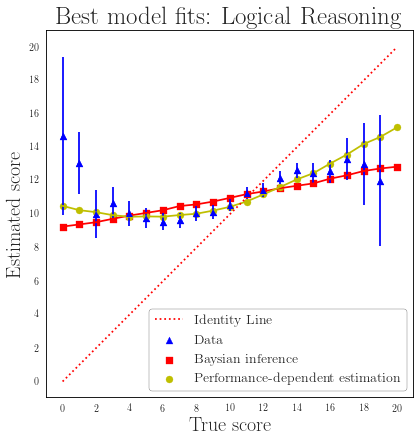

In [27]:
# plot model predictions and data means

k = lsat.absAssess1.groupby(lsat.score).mean()
# k=k[:-1]
sems = lsat.absAssess1.groupby(lsat.score).sem() # SEMs
# sems=sems[:-1]
conf = sems*1.96

score = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
scoreNo20 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(scoreNo20, k, label="Data",color='b',marker='^')
ax.errorbar(scoreNo20, k, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(score, preds_guess['207'],color='r',label="_nolegend_")
ax.scatter(score, preds_guess['207'], label="Baysian inference",color='r',marker='s')
ax.plot(score, preds_dk_guess['2170'],color='y',label='_nolegend_')
ax.scatter(score, preds_dk_guess['2170'], label="Performance-dependent estimation",color='y')


ax.set_facecolor('white')
plt.title('Best model fits: Logical Reasoning', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(-1, color='black')
plt.axhline(21, color='black')
plt.axvline(21, color='black')
ax.set_xlim(-1,21)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks(np.arange(0, 22, step=2))
ax.set_xlabel('True score',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([0,5,10,15,20],[0,5,10,15,20], "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_logic_guess.png')
# fig.savefig('figs/Best_logic_guess.eps', dpi=1000)

### Quartile plot

In [37]:
lsat['quartile'] = pd.qcut(lsat["score"], 4)

In [39]:
preds_guess['207'][0]

9.263025543053683

In [41]:
lsat['quartile'].value_counts()

(-0.001, 7.0]    1072
(7.0, 10.0]      1002
(12.0, 19.0]      782
(10.0, 12.0]      687
Name: quartile, dtype: int64

In [42]:
scores_quart = lsat.score.groupby(lsat.quartile).mean()
scores_quart

quartile
(-0.001, 7.0]     5.091418
(7.0, 10.0]       9.060878
(10.0, 12.0]     11.499272
(12.0, 19.0]     14.140665
Name: score, dtype: float64

In [43]:
scores_sem = lsat.score.groupby(lsat.quartile).sem()
scores_sem

quartile
(-0.001, 7.0]    0.051041
(7.0, 10.0]      0.025404
(10.0, 12.0]     0.019090
(12.0, 19.0]     0.045032
Name: score, dtype: float64

In [44]:
SAquarts = lsat.absAssess1.groupby(lsat.quartile).mean()
SAquarts

quartile
(-0.001, 7.0]     9.942164
(7.0, 10.0]      10.261477
(10.0, 12.0]     11.371179
(12.0, 19.0]     12.446292
Name: absAssess1, dtype: float64

In [45]:
SAquarts_sem = lsat.absAssess1.groupby(lsat.quartile).sem()
SAquarts_sem

quartile
(-0.001, 7.0]    0.137291
(7.0, 10.0]      0.120763
(10.0, 12.0]     0.140539
(12.0, 19.0]     0.122622
Name: absAssess1, dtype: float64

In [46]:
lsat.absAssess1.groupby(lsat.quartile).std()


quartile
(-0.001, 7.0]    4.495086
(7.0, 10.0]      3.822680
(10.0, 12.0]     3.683615
(12.0, 19.0]     3.429040
Name: absAssess1, dtype: float64

In [47]:
lsat['ind'] = [preds_guess['207'][x] for x in lsat['score'].astype(int)]

In [48]:
lsat['dep'] = [preds_dk_guess['2170'][x] for x in lsat['score'].astype(int)]

In [49]:
ind_quarts = lsat.ind.groupby(lsat.quartile).mean()
ind_quarts

quartile
(-0.001, 7.0]    10.110834
(7.0, 10.0]      10.788091
(10.0, 12.0]     11.283665
(12.0, 19.0]     11.748973
Name: ind, dtype: float64

In [50]:
dep_quarts = lsat.dep.groupby(lsat.quartile).mean()
dep_quarts

quartile
(-0.001, 7.0]     9.920818
(7.0, 10.0]      10.244004
(10.0, 12.0]     10.974043
(12.0, 19.0]     12.145742
Name: dep, dtype: float64

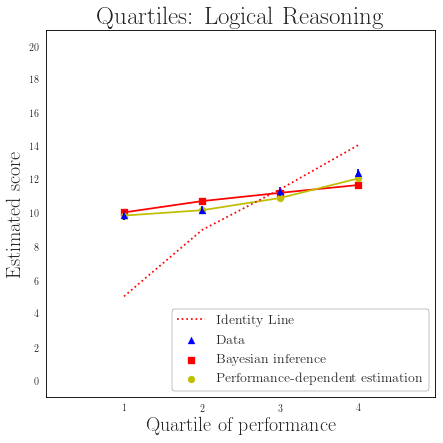

In [52]:
# plot model predictions and data means

conf = SAquarts_sem*1.96

quarts = [1,2,3,4]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(quarts, SAquarts, label="Data",color='b',marker='^')
ax.errorbar(quarts, SAquarts, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(quarts, ind_quarts,color='r',label="_nolegend_")
ax.scatter(quarts, ind_quarts, label="Bayesian inference",color='r',marker='s')
ax.plot(quarts, dep_quarts,color='y',label='_nolegend_')
ax.scatter(quarts, dep_quarts, label="Performance-dependent estimation",color='y')


ax.set_facecolor('white')
plt.title('Quartiles: Logical Reasoning', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(0, color='black')
plt.axhline(21, color='black')
plt.axvline(5, color='black')
ax.set_xlim(0,5)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(1, 5, step=1))
ax.set_yticks(np.arange(0, 22, step=2))
ax.set_xlabel('Quartile of performance',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([1,2,3,4],scores_quart, "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
# ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_model_quartiles_logic.png')
# fig.savefig('figs/Best_model_quartiles_logic.eps', dpi=1000)

## Quadratic fit

In [21]:
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Versions/3.2/Resources'

import rpy2

# the following lines will allow us to convert between Pandas DataFrames and R DataFrames
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import ri2py

# this loads the R magic extension
%load_ext rpy2.ipython

In [22]:
lsat['score2'] = [score**2 for score in lsat.score]
lsat[['score','score2']].head()

,score,score2
6,7.0,49.0
7,7.0,49.0
8,3.0,9.0
10,5.0,25.0
11,10.0,100.0


In [23]:
%%R -i lsat

model0 <- lm(absAssess1 ~ score + score2, data=lsat)
summary(model0)
# anova(model0)


Call:
lm(formula = absAssess1 ~ score + score2, data = lsat_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8391  -2.5822  -0.0576   2.7446  10.0322 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.031110   0.363455  30.351  < 2e-16 ***
score       -0.375721   0.082547  -4.552 5.50e-06 ***
score2       0.033083   0.004387   7.541 5.88e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.936 on 3540 degrees of freedom
Multiple R-squared:  0.05706,	Adjusted R-squared:  0.05653 
F-statistic: 107.1 on 2 and 3540 DF,  p-value: < 2.2e-16



In [24]:
%%R -i lsat

model1 <- lm(absAssess1 ~ score, data=lsat)
print(sum(model1$residuals^2))
summary(model1)
# anova(model1)

[1] 55730.72

Call:
lm(formula = absAssess1 ~ score, data = lsat_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1439  -2.6817  -0.0641   2.8561  11.0913 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.67762    0.18775   46.22   <2e-16 ***
score        0.23109    0.01857   12.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.967 on 3541 degrees of freedom
Multiple R-squared:  0.04191,	Adjusted R-squared:  0.04164 
F-statistic: 154.9 on 1 and 3541 DF,  p-value: < 2.2e-16



In [25]:
%%R -i lsat
print(sum(model1$residuals^2))
print(sum(model0$residuals^2))

[1] 55730.72
[1] 54849.56


In [26]:
df1 = 3541
df2 = 3540
sse1 = 55730.72
sse2 = 54849.56

In [27]:
f = ((sse1-sse2)/(df1-df2))/(sse2/df2)
f

56.87021737275581

In [29]:
%%R -i lsat
anova(model1,model0)

Analysis of Variance Table

Model 1: absAssess1 ~ score
Model 2: absAssess1 ~ score + score2
  Res.Df   RSS Df Sum of Sq      F    Pr(>F)    
1   3541 55731                                  
2   3540 54850  1    881.17 56.871 5.881e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
